In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 sample points
num_points = 100
data = pd.DataFrame({
    'latitude': np.random.uniform(18.5, 19.0, num_points),
    'longitude': np.random.uniform(73.0, 74.0, num_points),
    'ndvi': np.random.uniform(0.1, 0.9, num_points),
    'wildlife_density': np.random.randint(0, 50, num_points),
    'remoteness_score': np.random.uniform(0.0, 1.0, num_points),
})

# Generate target label based on logic
# Higher wildlife + higher remoteness + low NDVI = high poaching risk
data['poaching_risk'] = (
    (data['wildlife_density'] > 25) &
    (data['remoteness_score'] > 0.6) &
    (data['ndvi'] < 0.4)
).astype(int)

data.head()


,latitude,longitude,ndvi,wildlife_density,remoteness_score,poaching_risk
0,18.687270,73.031429,0.613625,44,0.273961,0
1,18.975357,73.636410,0.167312,31,0.214589,0
2,18.865997,73.314356,0.229303,29,0.377259,0
3,18.799329,73.508571,0.818843,46,0.038963,0
4,18.578009,73.907566,0.585143,34,0.618254,0


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20



C:\Users\Tejas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tejas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tejas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


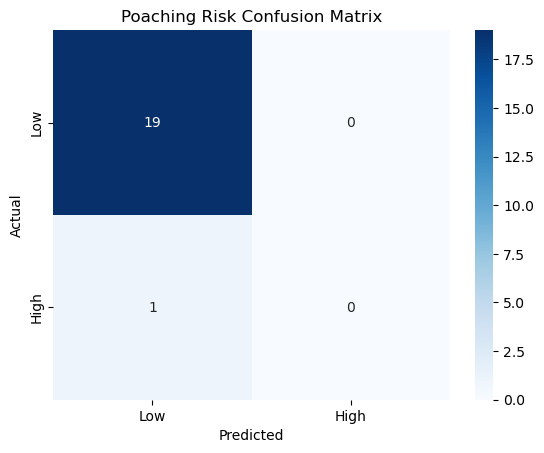

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Features and label
X = data[['ndvi', 'wildlife_density', 'remoteness_score']]
y = data['poaching_risk']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Poaching Risk Confusion Matrix")
plt.show()


In [7]:
# Sample new locations (could be real GPS data from patrol drones or sensors)
new_data = pd.DataFrame({
    'ndvi': [0.32, 0.75, 0.28],
    'wildlife_density': [30, 12, 40],
    'remoteness_score': [0.7, 0.2, 0.9]
})

# Predict using trained model
predictions = model.predict(new_data)

# Attach results to the data
new_data['predicted_poaching_risk'] = predictions

# Display
new_data


,ndvi,wildlife_density,remoteness_score,predicted_poaching_risk
0,0.32,30,0.7,0
1,0.75,12,0.2,0
2,0.28,40,0.9,0


In [9]:
!pip install folium


In [11]:
import folium

# Create base map centered near your region
map_center = [18.75, 73.5]
risk_map = folium.Map(location=map_center, zoom_start=9)

# Loop through predicted data points
for i, row in new_data.iterrows():
    location = [map_center[0] + i*0.01, map_center[1] + i*0.01]  # dummy lat/lon shifts
    risk = row['predicted_poaching_risk']
    
    color = 'red' if risk == 1 else 'green'
    label = 'High Risk' if risk == 1 else 'Low Risk'
    
    folium.Marker(
        location=location,
        popup=f"{label} - NDVI: {row['ndvi']:.2f}",
        icon=folium.Icon(color=color)
    ).add_to(risk_map)

# Show map
risk_map
